Checking NVIDIA GPU Status

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


Image Preprocessing and Augmentation

Mounted at /content/drive
❌ Mask not found for image: test_image.jpg
✅ Number of images loaded: 74
✅ Number of masks loaded: 74


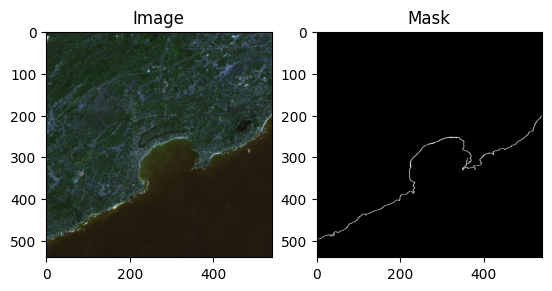

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.utils import Sequence

# Mount Google Drive (if running on Google Colab)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Function to load images and masks
def load_images_and_masks(image_folder, mask_folder, target_size=(540, 540)):
    image_files = sorted(os.listdir(image_folder))  # Get all image filenames
    mask_files = sorted(os.listdir(mask_folder))    # Get all mask filenames

    images = []
    masks = []

    for img_file in image_files:
        # Skip if file is not a jpg image
        if not img_file.endswith('.jpg'):
            continue

        # Construct corresponding mask file name (same name as image, but .png extension)
        mask_file = img_file.replace('.jpg', '.png')  # Change extension from .jpg to .png

        # Check if corresponding mask file exists
        if mask_file in mask_files:
            img_path = os.path.join(image_folder, img_file)
            mask_path = os.path.join(mask_folder, mask_file)

            # Read the image and the mask
            image = cv2.imread(img_path)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Read mask in grayscale

            if image is not None and mask is not None:
                # Resize images and masks to the target size
                image = cv2.resize(image, target_size)
                mask = cv2.resize(mask, target_size)

                images.append(image)
                masks.append(mask)
            else:
                print(f"❌ Error: Failed to load image or mask for {img_file}")
        else:
            print(f"❌ Mask not found for image: {img_file}")

    # Convert lists to numpy arrays
    X = np.array(images)
    Y = np.array(masks)

    return X, Y

# Define paths to the folders containing images and masks
image_folder = "/content/drive/My Drive/DSGP_Ravisha/sattelite images/"
mask_folder = "/content/drive/My Drive/DSGP_Ravisha/Final/"

# Load images and masks
X, Y = load_images_and_masks(image_folder, mask_folder)

# Check if the dataset is loaded properly
if X.shape[0] == 0 or Y.shape[0] == 0:
    raise ValueError("❌ Error: Dataset is empty. Check file paths and formats.")

print(f"✅ Number of images loaded: {X.shape[0]}")
print(f"✅ Number of masks loaded: {Y.shape[0]}")

# Normalize images (if necessary, depending on the model)
X = X / 255.0

# Split the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Data Augmentation for training images
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator on the training data
datagen.fit(X_train)

# Visualize a sample image and its mask
index = 0
plt.subplot(1, 2, 1)
plt.imshow(X_train[index])
plt.title("Image")
plt.subplot(1, 2, 2)
plt.imshow(Y_train[index], cmap='gray')
plt.title("Mask")
plt.show()

# Now X_train, Y_train, X_test, and Y_test are ready for training.
# You can proceed with model training using these arrays.

# Define a custom data generator to handle resizing
class ImageMaskGenerator(Sequence):
    def __init__(self, images, masks, batch_size, target_size=(540, 540)):
        self.images = images
        self.masks = masks
        self.batch_size = batch_size
        self.target_size = target_size
        self.indexes = np.arange(len(self.images))

    def __len__(self):
        return int(np.floor(len(self.images) / self.batch_size))

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_images = [self.images[i] for i in batch_indexes]
        batch_masks = [self.masks[i] for i in batch_indexes]

        # Resize images and masks
        batch_images_resized = np.array([cv2.resize(img, self.target_size) for img in batch_images])
        batch_masks_resized = np.array([cv2.resize(mask, self.target_size) for mask in batch_masks])

        return batch_images_resized, batch_masks_resized

    def on_epoch_end(self):
        np.random.shuffle(self.indexes)

# Create the data generators
train_gen = ImageMaskGenerator(X_train, Y_train, batch_size=2)
val_gen = ImageMaskGenerator(X_test, Y_test, batch_size=2)


In [ ]:
import numpy as np
import os

# Mount Google Drive (if running on Google Colab)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


# Define paths to your saved arrays
base_path = "/content/drive/My Drive/DSGP_Ravisha/target"

train_images_path = os.path.join(base_path, "training/numpy/images.npy")
train_masks_path = os.path.join(base_path, "training/numpy/masks.npy")

val_images_path = os.path.join(base_path, "validation/numpy/images.npy")
val_masks_path = os.path.join(base_path, "validation/numpy/masks.npy")

test_images_path = os.path.join(base_path, "testing/numpy/images.npy")
test_masks_path = os.path.join(base_path, "testing/numpy/masks.npy")

X_train = np.load(train_images_path)
Y_train = np.load(train_masks_path)

X_val = np.load(val_images_path)
Y_val = np.load(val_masks_path)

X_test = np.load(test_images_path)
Y_test = np.load(test_masks_path)

print(f"Training images shape: {X_train.shape}")
print(f"Training masks shape: {Y_train.shape}")
print(f"Validation images shape: {X_val.shape}")
print(f"Validation masks shape: {Y_val.shape}")
print(f"Testing images shape: {X_test.shape}")
print(f"Testing masks shape: {Y_test.shape}")


Mounted at /content/drive
Files in directory: ['images.npy', 'masks.npy']
Training images shape: (51, 540, 540, 3)
Training masks shape: (51, 540, 540)
Validation images shape: (11, 540, 540, 3)
Validation masks shape: (11, 540, 540)
Testing images shape: (12, 540, 540, 3)
Testing masks shape: (12, 540, 540)


Building a SegNet Model

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam  # Import Adam optimizer


def create_segnet_model(input_shape=(540, 540, 3)):
    model = models.Sequential()

    # Encoder (Downsampling)
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))

    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))

    # Decoder (Upsampling)
    model.add(layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))

    # 🔥 Adjust the last Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))

    # 🔹 Apply Cropping to Ensure Output is Exactly 540x540
    model.add(layers.Cropping2D(((2, 2), (2, 2))))  # Crop excess pixels evenly

    # Output Layer: 1 channel, same size as input (540, 540)
    model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

    return model


# Create model
model = create_segnet_model()

import tensorflow as tf

def focal_loss(y_true, y_pred, gamma=2., alpha=0.25):
    epsilon = tf.keras.backend.epsilon()
    y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
    y_true = tf.cast(y_true, tf.float32)

    cross_entropy = -y_true * tf.math.log(y_pred)
    loss = alpha * tf.pow(1 - y_pred, gamma) * cross_entropy
    return tf.reduce_mean(loss)



#Compile model
learning_rate = 0.001  # Recommended starting point
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'],)

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 540, 540, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 270, 270, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 270, 270, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 135, 135, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 135, 135, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 68, 68, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 136, 136, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 272, 272, 128)       │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 544, 544, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cropping2d (Cropping2D)              │ (None, 540, 540, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 540, 540, 1)         │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,330,305 (5.07 MB)

 Trainable params: 1,330,305 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

Training SegNet Model

In [ ]:
# Ensure TensorFlow runs on GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print("Using GPU:", gpus[0])
    except RuntimeError as e:
        print(e)


history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=100,
    batch_size=2
)


# Save the trained model
model.save('/content/drive/MyDrive/DSGP_Ravisha/segnet_model.h5')  # Change the path if needed
print("Model saved successfully!")


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 298s 11s/step - accuracy: 0.0545 - loss: -6.3802 - val_accuracy: 0.0381 - val_loss: -12.6214
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 337s 12s/step - accuracy: 0.2613 - loss: -13.2189 - val_accuracy: 0.9079 - val_loss: -14.1110
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 294s 11s/step - accuracy: 0.7731 - loss: -14.8504 - val_accuracy: 0.7541 - val_loss: -16.9373
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 330s 12s/step - accuracy: 0.8749 - loss: -17.0049 - val_accuracy: 0.9563 - val_loss: -16.2067
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 317s 11s/step - accuracy: 0.8982 - loss: -17.1894 - val_accuracy: 0.9374 - val_loss: -18.0023
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 325s 12s/step - accuracy: 0.9362 - loss: -17.5362 - val_accuracy: 0.9602 - val_loss: -17.9511
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 291s 11s/step - accuracy: 0.9509 - loss: -18.0356 - val_accuracy: 0.9429 - val_loss: -18.1011
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 332s 12s/step - accuracy: 0.942

In [ ]:
# For predicting on the test data
predictions = model.predict(X_test)  # X_test should have the same shape as the input images


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Converting Model Predictions to Binary Masks

In [ ]:
# Convert probabilities to binary (0 or 1) using a threshold
binary_predictions = (predictions > 0.5).astype(np.uint8)


Visualizing Input, Ground Truth, and Predicted Masks

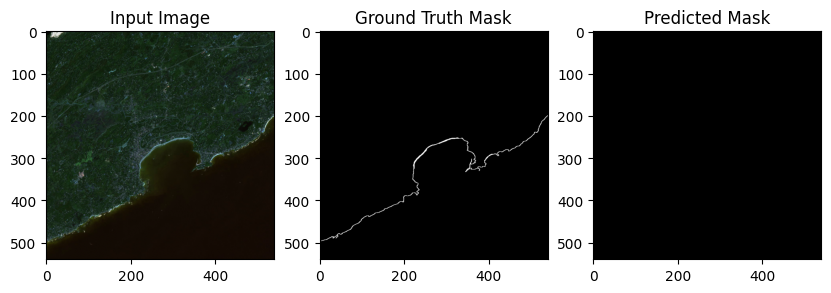

In [ ]:
# Pick a random index to visualize the output
index = 7  # You can change this index to visualize different images

plt.figure(figsize=(10, 5))

# Show the input image
plt.subplot(1, 3, 1)
plt.imshow(X_test[index])
plt.title("Input Image")

# Show the ground truth mask
plt.subplot(1, 3, 2)
plt.imshow(Y_test[index], cmap='gray')
plt.title("Ground Truth Mask")

# Show the predicted mask
plt.subplot(1, 3, 3)
plt.imshow(binary_predictions[index].squeeze(), cmap='gray')
plt.title("Predicted Mask")

plt.show()


Visualizing Predictions on New Satellite Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


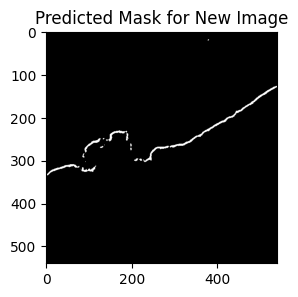

In [ ]:
# Preprocess the new image (resize and normalize)
new_image = cv2.imread('/content/sentinel2_void_2018-12-17_Unawatuna.jpg')
new_image_resized = cv2.resize(new_image, (540, 540)) / 255.0  # Resize and normalize
new_image_expanded = np.expand_dims(new_image_resized, axis=0)  # Add batch dimension delete if not working

# Make a prediction on the new image
#prediction_new_image = model.predict(np.expand_dims(new_image_resized, axis=0))

# Threshold the prediction to get a binary mask
#binary_prediction_new_image = (prediction_new_image > 0.5).astype(np.uint8)

predicted_mask = model.predict(new_image_expanded)
binary_predicted_mask = (predicted_mask > 0.5).astype(np.uint8)  # Convert to binary


# Visualize the prediction for the new image
plt.figure(figsize=(3, 3))
plt.imshow(binary_predicted_mask[0].squeeze(), cmap='gray')
plt.title("Predicted Mask for New Image")
plt.show()
